In [1]:
# Things required to unpack the CIFAR-10 library
import os
# import h5py
import six
from six.moves import range, cPickle
import tarfile

# Main Library for Matrices manipulation
import numpy as np

# To draw the images
import matplotlib.pyplot as plt

import pickle

def pydump(obj, filename):
    with open(filename, 'wb') as f:
        pickle.dump(obj, f)

def pyload(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)


def cifar_10():
    # LOAD TRAINING DATA
    tar_file = tarfile.open("cifar-10-python.tar.gz", 'r:gz')
    train_batches = []
    for batch in range(1, 6):
        file = tar_file.extractfile(
            'cifar-10-batches-py/data_batch_%d' % batch)
        try:
            if six.PY3:
                array = cPickle.load(file, encoding='latin1')
            else:
                array = cPickle.load(file)
            train_batches.append(array)
        finally:
            file.close()

    train_features = np.concatenate(
        [batch['data'].reshape(batch['data'].shape[0], 3, 32, 32)
            for batch in train_batches])
    train_labels = np.concatenate(
        [np.array(batch['labels'], dtype=np.uint8)
            for batch in train_batches])
    train_labels = np.expand_dims(train_labels, 1)


    # LOAD TEST DATA
    file = tar_file.extractfile('cifar-10-batches-py/test_batch')
    try:
        if six.PY3:
            test = cPickle.load(file, encoding='latin1')
        else:
            test = cPickle.load(file)
    finally:
        file.close()

    test_features = test['data'].reshape(test['data'].shape[0],
                                         3, 32, 32)
    test_labels = np.array(test['labels'], dtype=np.uint8)
    test_labels = np.expand_dims(test_labels, 1)

    return train_features, train_labels, test_features, test_labels

train_features, train_labels, test_features, test_labels = cifar_10()
# train100_labels, train100_labels, test100_features, test100_labels = load_cifar(100)

X = train_features.reshape(50000, 3*32*32)
Xt = test_features.reshape(10000, 3*32*32)
y = train_labels.flatten()
yt = test_labels.flatten()

# X100 = train100_features.reshape(50000, 3*32*32)
# Xt100 = test100_features.reshape(10000, 3*32*32)
# y100 = train100_labels.flatten()
# yt100 = test100_labels.flatten()

# Helps with writing functions!
msg = lambda x: print("%s ... " % x, end="")
done = lambda: print("done.")

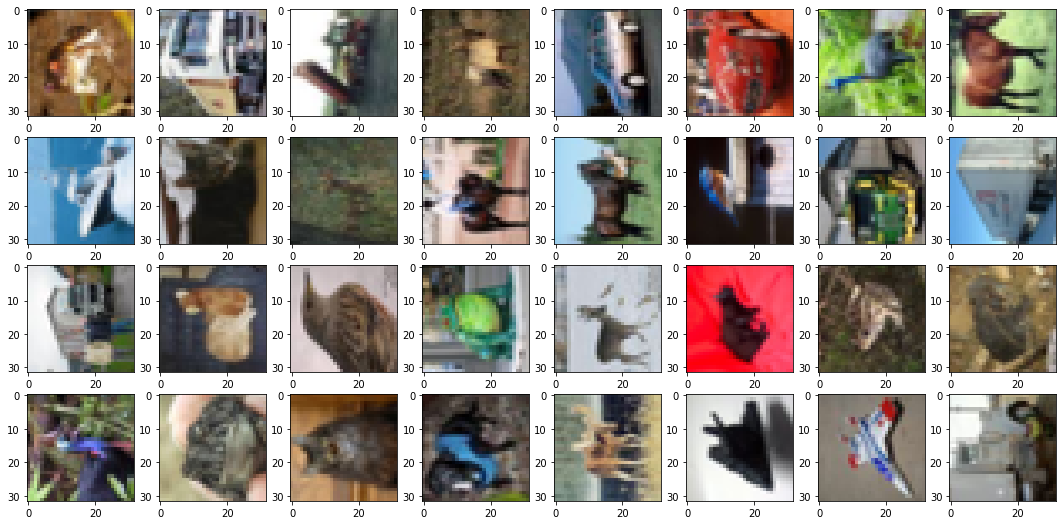

In [3]:
# 查看图像
fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(train_features[i].T)

In [9]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.svm as svm

scores=[]
scorest=[]

In [4]:
# PCA降维+LR逻辑回归分类
linreg = LogisticRegression(verbose=True, n_jobs=-1)
linreg.fit(X, y)
X_pred = linreg.predict(X)
Xt_pred = linreg.predict(Xt)
scores.append(metrics.accuracy_score(y, X_pred))
scorest.append(metrics.accuracy_score(yt, Xt_pred))

def pca_logistic(comp):
    pca = PCA(n_components=comp)
    pca.fit(X,y)
    X_pca = pca.transform(X)
    Xt_pca = pca.transform(Xt)
    linreg = LogisticRegression(verbose=True, n_jobs=-1)
    linreg.fit(X_pca, y)
    X_pred = linreg.predict(X_pca)
    Xt_pred = linreg.predict(Xt_pca)
    scores.append(metrics.accuracy_score(y, X_pred))
    scorest.append(metrics.accuracy_score(yt, Xt_pred))

for comp in [50, 100, 150, 200, 250, 300]:
    pca_logistic(comp)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   10.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

In [5]:
print(scores)
print(scorest)

[0.4258, 0.37622, 0.4028, 0.41138, 0.42218, 0.42976, 0.43402]
[0.4024, 0.3771, 0.401, 0.4028, 0.4051, 0.4085, 0.4076]


In [6]:
import pandas as pd
pd_results = pd.DataFrame([
        ['NO',  scorest[0]],
        ['50',  scorest[1]],
        ['100', scorest[2]],
        ['150', scorest[3]],
        ['200', scorest[4]],
        ['250', scorest[5]],
        ['300', scorest[6]]
    ], columns=['PCAComponents', 'TestAccuracy'])
pd_results

,PCAComponents,TestAccuracy
0,NO,0.4024
1,50,0.3771
2,100,0.4010
3,150,0.4028
4,200,0.4051
5,250,0.4085
6,300,0.4076


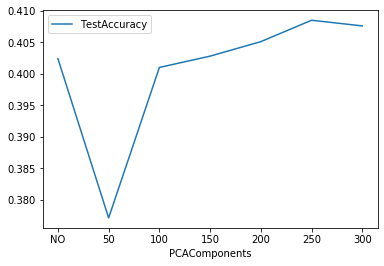

In [7]:
pd_results.plot(x='PCAComponents')

In [4]:
# 决策树
dtc = DecisionTreeClassifier(min_samples_split=8)
dtc.fit(X, y)
X_pred = dtc.predict(X)
Xt_pred = dtc.predict(Xt)
print(metrics.accuracy_score(y, X_pred))
print(metrics.accuracy_score(yt, Xt_pred))


0.85582
0.268


In [7]:
# 随机森林
rfc = RandomForestClassifier(n_estimators=128, n_jobs=-1)
rfc.fit(X, y)
X_pred = rfc.predict(X)
Xt_pred = rfc.predict(Xt)
print(metrics.accuracy_score(y, X_pred))
print(metrics.accuracy_score(yt, Xt_pred))

1.0
0.4743


In [8]:
# svm
# banxiaoshimeipaodong
'''
svc = svm.SVC(kernel='sigmoid', max_iter=500)
svc.fit(X, y)
X_pred = svc.predict(X)
Xt_pred = svc.predict(Xt)
print(metrics.accuracy_score(y, X_pred))
print(metrics.accuracy_score(yt, Xt_pred))
'''


NameError: name 'svm' is not defined

In [8]:
# 降维+KNN分类
# 电脑跑了半小时没跑动c
'''
scores=[]
scorest=[]

def pca_knn(comp):
    pca = PCA(n_components=comp)
    pca.fit(X,y)
    X_pca = pca.transform(X)
    Xt_pca = pca.transform(Xt)
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_pca, y)
    X_pred = knn.predict(X_pca)
    Xt_pred = knn.predict(Xt_pca)
    scores.append(metrics.accuracy_score(y, X_pred))
    scorest.append(metrics.accuracy_score(yt, Xt_pred))

# for comp in [50, 100, 150, 200, 250, 300]:
for comp in [25, 50, 75, 100]:
    pca_knn(comp)


import pandas as pd
pd_results = pd.DataFrame([
        ['25', score[0]],
        ['50', score[1]],
        ['75', score[2]],
        ['100', score[3]]
    ], columns=['Number of PCA Components', 'Accuracy'])
pd_results

pd_results.plot(x='Number of PCA Components')
'''

In [5]:
# 灰度处理

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
import pandas as pd
import scipy

def rgb2gray_array(rgb):

    r, g, b = rgb[:,0,:,:], rgb[:,1,:,:], rgb[:,2,:,:]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

train_features_gray = rgb2gray_array(train_features)
test_features_gray = rgb2gray_array(test_features)

In [6]:
print(train_features_gray.shape)
print(test_features_gray.shape)

(50000, 32, 32)
(10000, 32, 32)


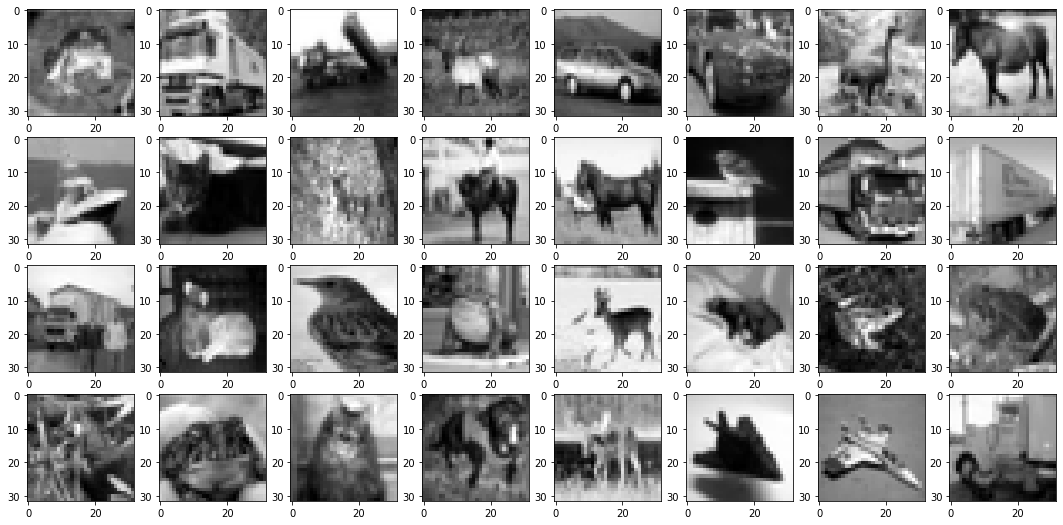

In [7]:
# 显示灰度图片
fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(train_features_gray[i], cmap='gray')

In [18]:
# 逻辑回归
X_ = train_features_gray.reshape(50000,32*32)
Xt_ = test_features_gray.reshape(10000,32*32)

pca = PCA(n_components=200)
pca.fit(X_, y)
X_pca = pca.transform(X_)
Xt_pca = pca.transform(Xt_)

linreg = LogisticRegression(verbose=True, n_jobs=-1)
linreg.fit(X_pca, y)

X_predicted = linreg.predict(X_pca)
print(metrics.accuracy_score(y, X_predicted))

Xt_pred = linreg.predict(Xt_pca)
print(metrics.accuracy_score(yt, Xt_pred))
# 灰度处理后反而少很多

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
0.3133
0.2998
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   12.7s finished
